ERROR-------> 16.92276630565825
global_best_position 16.92276630565825 -1
ERROR-------> 6.13595388794955
global_best_position 6.13595388794955 -1
ERROR-------> 10.765084284371705
global_best_position 10.765084284371705 -1
ERROR-------> 10.371820570982361
global_best_position 10.371820570982361 -1
ERROR-------> 14.039261078222644
global_best_position 14.039261078222644 -1
ERROR-------> 14.018289773292496
global_best_position 14.018289773292496 -1
ERROR-------> 8.367356946163287
global_best_position 8.367356946163287 -1
ERROR-------> 8.567774629180331
global_best_position 8.567774629180331 -1
ERROR-------> 19.33569472061724
global_best_position 19.33569472061724 -1
ERROR-------> 24.246274136094257
global_best_position 24.246274136094257 -1
ERROR-------> 18.28241465781589
global_best_position 18.28241465781589 -1
ERROR-------> 20.536030596859426
global_best_position 20.536030596859426 -1
ERROR-------> 18.92456463701015
global_best_position 18.92456463701015 -1
ERROR-------> 9.612318455176

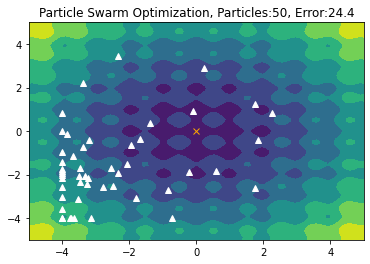

ERROR-------> 32.75507240141648
global_best_position 32.75507240141648 -1
ERROR-------> 6.661496469077795
global_best_position 6.661496469077795 32.75507240141648
ERROR-------> 14.705448587572075
global_best_position 14.705448587572075 6.661496469077795
ERROR-------> 29.457537298103368
global_best_position 29.457537298103368 6.661496469077795
ERROR-------> 22.294897117646535
global_best_position 22.294897117646535 6.661496469077795
ERROR-------> 17.021645290125406
global_best_position 17.021645290125406 6.661496469077795
ERROR-------> 9.530326948301935
global_best_position 9.530326948301935 6.661496469077795
ERROR-------> 19.771448585201263
global_best_position 19.771448585201263 6.661496469077795
ERROR-------> 10.869052277506217
global_best_position 10.869052277506217 6.661496469077795
ERROR-------> 28.32248648710637
global_best_position 28.32248648710637 6.661496469077795
ERROR-------> 18.050409273653894
global_best_position 18.050409273653894 6.661496469077795
ERROR-------> 20.78193

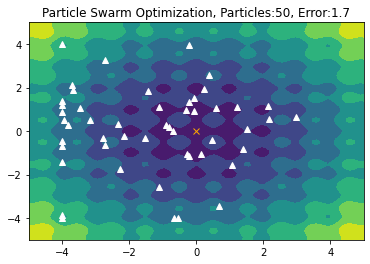

ERROR-------> 22.194480215198354
global_best_position 22.194480215198354 1.6865294578853298
ERROR-------> 1.5575815724810758
global_best_position 1.5575815724810758 -1
ERROR-------> 8.584774500803228
global_best_position 8.584774500803228 -1
ERROR-------> 19.662622813104157
global_best_position 19.662622813104157 -1
ERROR-------> 22.614423037010845
global_best_position 22.614423037010845 -1
ERROR-------> 20.716336810069755
global_best_position 20.716336810069755 -1
ERROR-------> 2.519355706479021
global_best_position 2.519355706479021 -1
ERROR-------> 21.04612491295191
global_best_position 21.04612491295191 -1
ERROR-------> 5.089299691506337
global_best_position 5.089299691506337 -1
ERROR-------> 12.408433357542256
global_best_position 12.408433357542256 -1
ERROR-------> 13.90284190250544
global_best_position 13.90284190250544 -1
ERROR-------> 4.747010262071452
global_best_position 4.747010262071452 -1
ERROR-------> 31.968827819725718
global_best_position 31.968827819725718 -1
ERROR---

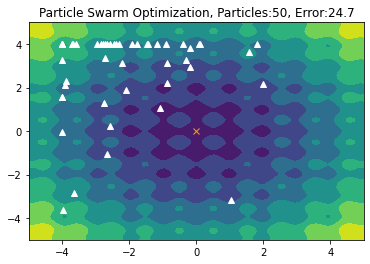

ERROR-------> 12.61430853223478
global_best_position 12.61430853223478 -1
ERROR-------> 32.0
global_best_position 32.0 12.61430853223478
ERROR-------> 9.889841246224789
global_best_position 9.889841246224789 12.61430853223478
ERROR-------> 21.43911863339969
global_best_position 21.43911863339969 9.889841246224789
ERROR-------> 20.009398606688602
global_best_position 20.009398606688602 9.889841246224789
ERROR-------> 32.0
global_best_position 32.0 9.889841246224789
ERROR-------> 18.825379636195407
global_best_position 18.825379636195407 9.889841246224789
ERROR-------> 9.297982712980293
global_best_position 9.297982712980293 9.889841246224789
ERROR-------> 26.052911188391118
global_best_position 26.052911188391118 9.297982712980293
ERROR-------> 17.956684241772727
global_best_position 17.956684241772727 9.297982712980293
ERROR-------> 24.14593125822504
global_best_position 24.14593125822504 9.297982712980293
ERROR-------> 21.439319462993588
global_best_position 21.439319462993588 9.29798

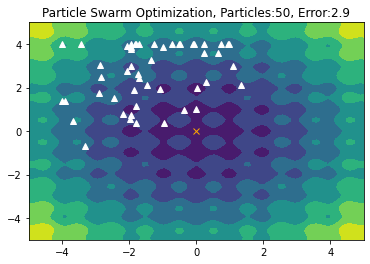

ERROR-------> 10.696537196967128
global_best_position 10.696537196967128 2.92121734905319
ERROR-------> 22.674173005753907
global_best_position 22.674173005753907 -1
ERROR-------> 15.22123982510311
global_best_position 15.22123982510311 -1
ERROR-------> 20.288184819763668
global_best_position 20.288184819763668 -1
ERROR-------> 6.383104125747906
global_best_position 6.383104125747906 -1
ERROR-------> 20.670347034613183
global_best_position 20.670347034613183 -1
ERROR-------> 22.706249598849443
global_best_position 22.706249598849443 -1
ERROR-------> 16.87163490242357
global_best_position 16.87163490242357 -1
ERROR-------> 12.865780875353337
global_best_position 12.865780875353337 -1
ERROR-------> 9.046131129965538
global_best_position 9.046131129965538 -1
ERROR-------> 23.1469450431073
global_best_position 23.1469450431073 -1
ERROR-------> 21.418220278223824
global_best_position 21.418220278223824 -1
ERROR-------> 18.563885162127946
global_best_position 18.563885162127946 -1
ERROR-----

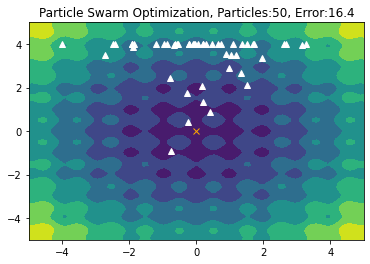

ERROR-------> 19.65515802601557
global_best_position 19.65515802601557 -1
ERROR-------> 28.216456814561116
global_best_position 28.216456814561116 19.65515802601557
ERROR-------> 32.0
global_best_position 32.0 19.65515802601557
ERROR-------> 14.918488542222919
global_best_position 14.918488542222919 19.65515802601557
ERROR-------> 7.528325838221504
global_best_position 7.528325838221504 14.918488542222919
ERROR-------> 27.481527141098763
global_best_position 27.481527141098763 7.528325838221504
ERROR-------> 19.99655705576572
global_best_position 19.99655705576572 7.528325838221504
ERROR-------> 18.15084920670373
global_best_position 18.15084920670373 7.528325838221504
ERROR-------> 9.972075868969219
global_best_position 9.972075868969219 7.528325838221504
ERROR-------> 17.69783315963283
global_best_position 17.69783315963283 7.528325838221504
ERROR-------> 29.05698415695587
global_best_position 29.05698415695587 7.528325838221504
ERROR-------> 16.407267204120203
global_best_position 1

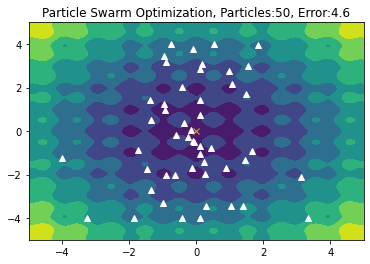

ERROR-------> 5.305634438662657
global_best_position 5.305634438662657 4.624109277873611
ERROR-------> 14.80172911124077
global_best_position 14.80172911124077 -1
ERROR-------> 20.748472879033777
global_best_position 20.748472879033777 -1
ERROR-------> 4.596574573195856
global_best_position 4.596574573195856 -1
ERROR-------> 18.048373428050027
global_best_position 18.048373428050027 -1
ERROR-------> 31.85763609795388
global_best_position 31.85763609795388 -1
ERROR-------> 7.7928611074490135
global_best_position 7.7928611074490135 -1
ERROR-------> 5.4380277591177455
global_best_position 5.4380277591177455 -1
ERROR-------> 14.190554489938535
global_best_position 14.190554489938535 -1
ERROR-------> 1.609631568269072
global_best_position 1.609631568269072 -1
ERROR-------> 20.61140359576507
global_best_position 20.61140359576507 -1
ERROR-------> 21.91443925261104
global_best_position 21.91443925261104 -1
ERROR-------> 20.515372562745135
global_best_position 20.515372562745135 -1
ERROR------

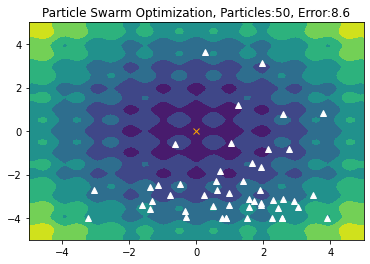

ERROR-------> 17.686852283343406
global_best_position 17.686852283343406 -1
ERROR-------> 11.057939891431074
global_best_position 11.057939891431074 17.686852283343406
ERROR-------> 25.369170264351027
global_best_position 25.369170264351027 11.057939891431074
ERROR-------> 27.084996395717127
global_best_position 27.084996395717127 11.057939891431074
ERROR-------> 18.78882977486287
global_best_position 18.78882977486287 11.057939891431074
ERROR-------> 10.517186023544607
global_best_position 10.517186023544607 11.057939891431074
ERROR-------> 24.37361256091487
global_best_position 24.37361256091487 10.517186023544607
ERROR-------> 26.15748475657459
global_best_position 26.15748475657459 10.517186023544607
ERROR-------> 15.22462805453093
global_best_position 15.22462805453093 10.517186023544607
ERROR-------> 23.785464924761524
global_best_position 23.785464924761524 10.517186023544607
ERROR-------> 19.284692814042465
global_best_position 19.284692814042465 10.517186023544607
ERROR-------

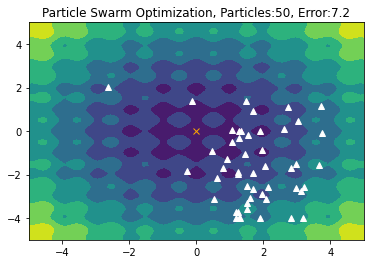

ERROR-------> 20.1155882313596
global_best_position 20.1155882313596 7.168502018279225
ERROR-------> 12.391763675241544
global_best_position 12.391763675241544 -1
ERROR-------> 17.77741239902976
global_best_position 17.77741239902976 -1
ERROR-------> 24.962897291770457
global_best_position 24.962897291770457 -1
ERROR-------> 15.26360064995917
global_best_position 15.26360064995917 -1
ERROR-------> 8.142386430346473
global_best_position 8.142386430346473 -1
ERROR-------> 8.9124142344524
global_best_position 8.9124142344524 -1
ERROR-------> 12.67366915462749
global_best_position 12.67366915462749 -1
ERROR-------> 8.66049919034855
global_best_position 8.66049919034855 -1
ERROR-------> 8.354166945496967
global_best_position 8.354166945496967 -1
ERROR-------> 26.24663782471022
global_best_position 26.24663782471022 -1
ERROR-------> 21.361018561586793
global_best_position 21.361018561586793 -1
ERROR-------> 9.330734315763806
global_best_position 9.330734315763806 -1
ERROR-------> 17.75189188

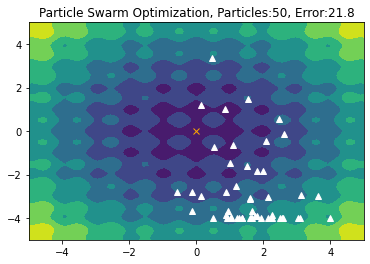

ERROR-------> 21.822529287773225
global_best_position 21.822529287773225 -1
ERROR-------> 15.176217998899059
global_best_position 15.176217998899059 21.822529287773225
ERROR-------> 32.0
global_best_position 32.0 15.176217998899059
ERROR-------> 16.002860890954093
global_best_position 16.002860890954093 15.176217998899059
ERROR-------> 3.175749803407575
global_best_position 3.175749803407575 15.176217998899059
ERROR-------> 4.53366920242127
global_best_position 4.53366920242127 3.175749803407575
ERROR-------> 25.351734686248513
global_best_position 25.351734686248513 3.175749803407575
ERROR-------> 22.743683061255062
global_best_position 22.743683061255062 3.175749803407575
ERROR-------> 17.289682760923583
global_best_position 17.289682760923583 3.175749803407575
ERROR-------> 18.27426815672745
global_best_position 18.27426815672745 3.175749803407575
ERROR-------> 19.575922118243092
global_best_position 19.575922118243092 3.175749803407575
ERROR-------> 28.30529702216816
global_best_po

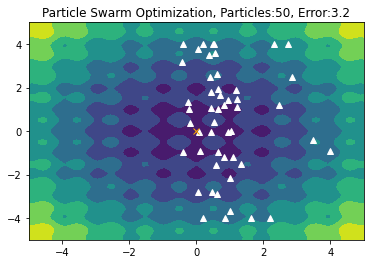

ERROR-------> 23.399994240187763
global_best_position 23.399994240187763 3.175749803407575
ERROR-------> 6.156093947732402
global_best_position 6.156093947732402 -1
ERROR-------> 18.83322728960032
global_best_position 18.83322728960032 -1
ERROR-------> 7.063800721077313
global_best_position 7.063800721077313 -1
ERROR-------> 8.96065442788361
global_best_position 8.96065442788361 -1
ERROR-------> 6.306190882174347
global_best_position 6.306190882174347 -1
ERROR-------> 23.747865596246825
global_best_position 23.747865596246825 -1
ERROR-------> 21.59190499997821
global_best_position 21.59190499997821 -1
ERROR-------> 17.71531608148174
global_best_position 17.71531608148174 -1
ERROR-------> 22.24750369254467
global_best_position 22.24750369254467 -1
ERROR-------> 14.493567485261888
global_best_position 14.493567485261888 -1
ERROR-------> 22.757161237002567
global_best_position 22.757161237002567 -1
ERROR-------> 1.1331505128625317
global_best_position 1.1331505128625317 -1
ERROR-------> 1

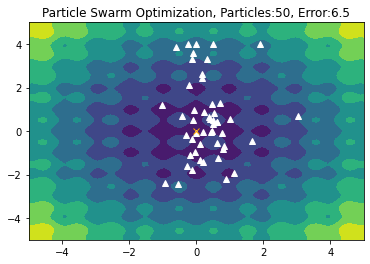

ERROR-------> 15.6937028749735
global_best_position 15.6937028749735 -1
ERROR-------> 1.3823951044400715
global_best_position 1.3823951044400715 15.6937028749735
ERROR-------> 11.720814366477695
global_best_position 11.720814366477695 1.3823951044400715
ERROR-------> 11.513002495129136
global_best_position 11.513002495129136 1.3823951044400715
ERROR-------> 9.178936510730175
global_best_position 9.178936510730175 1.3823951044400715
ERROR-------> 8.591470337536009
global_best_position 8.591470337536009 1.3823951044400715
ERROR-------> 11.596723212644982
global_best_position 11.596723212644982 1.3823951044400715
ERROR-------> 17.651599014505763
global_best_position 17.651599014505763 1.3823951044400715
ERROR-------> 22.243003531585554
global_best_position 22.243003531585554 1.3823951044400715
ERROR-------> 1.1321492294413247
global_best_position 1.1321492294413247 1.3823951044400715
ERROR-------> 6.6334815996049326
global_best_position 6.6334815996049326 1.1321492294413247
ERROR-------> 

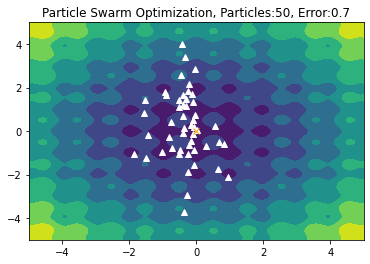

ERROR-------> 7.334251227486867
global_best_position 7.334251227486867 0.6913673542543597
ERROR-------> 6.689794116450369
global_best_position 6.689794116450369 -1
ERROR-------> 14.106739581098537
global_best_position 14.106739581098537 -1
ERROR-------> 8.11550607085685
global_best_position 8.11550607085685 -1
ERROR-------> 11.205484892977939
global_best_position 11.205484892977939 -1
ERROR-------> 8.165718312329451
global_best_position 8.165718312329451 -1
ERROR-------> 10.714735818567874
global_best_position 10.714735818567874 -1
ERROR-------> 22.394378037189945
global_best_position 22.394378037189945 -1
ERROR-------> 21.850009155517064
global_best_position 21.850009155517064 -1
ERROR-------> 12.450948546952876
global_best_position 12.450948546952876 -1
ERROR-------> 9.19592448995214
global_best_position 9.19592448995214 -1
ERROR-------> 18.354875446343335
global_best_position 18.354875446343335 -1
ERROR-------> 15.827442776403553
global_best_position 15.827442776403553 -1
ERROR-----

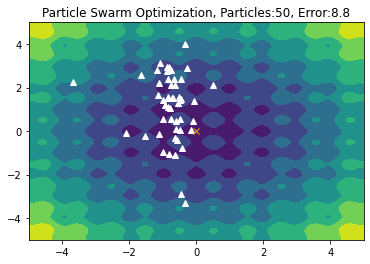

ERROR-------> 19.2570857636967
global_best_position 19.2570857636967 -1
ERROR-------> 11.569611517610891
global_best_position 11.569611517610891 19.2570857636967
ERROR-------> 12.62952061074019
global_best_position 12.62952061074019 11.569611517610891
ERROR-------> 1.336545335064958
global_best_position 1.336545335064958 11.569611517610891
ERROR-------> 12.136254472012869
global_best_position 12.136254472012869 1.336545335064958
ERROR-------> 10.357084534291511
global_best_position 10.357084534291511 1.336545335064958
ERROR-------> 4.871045886862707
global_best_position 4.871045886862707 1.336545335064958
ERROR-------> 20.754852840987702
global_best_position 20.754852840987702 1.336545335064958
ERROR-------> 11.827040843448685
global_best_position 11.827040843448685 1.336545335064958
ERROR-------> 15.113205822528716
global_best_position 15.113205822528716 1.336545335064958
ERROR-------> 13.489365549704036
global_best_position 13.489365549704036 1.336545335064958
ERROR-------> 12.709367

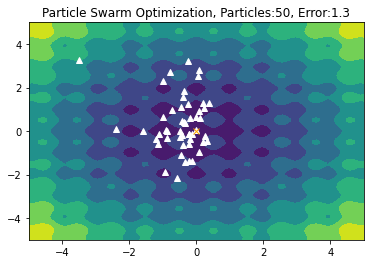

ERROR-------> 7.927025409937171
global_best_position 7.927025409937171 1.336545335064958
ERROR-------> 3.398525442859279
global_best_position 3.398525442859279 -1
ERROR-------> 8.368905036662591
global_best_position 8.368905036662591 -1
ERROR-------> 10.85343078815218
global_best_position 10.85343078815218 -1
ERROR-------> 10.106405406965141
global_best_position 10.106405406965141 -1
ERROR-------> 11.090176223567422
global_best_position 11.090176223567422 -1
ERROR-------> 9.627519042714523
global_best_position 9.627519042714523 -1
ERROR-------> 16.270422454166628
global_best_position 16.270422454166628 -1
ERROR-------> 4.004225538669879
global_best_position 4.004225538669879 -1
ERROR-------> 8.067543074910906
global_best_position 8.067543074910906 -1
ERROR-------> 1.4864325943803864
global_best_position 1.4864325943803864 -1
ERROR-------> 11.682088001016426
global_best_position 11.682088001016426 -1
ERROR-------> 1.2428054663429497
global_best_position 1.2428054663429497 -1
ERROR------

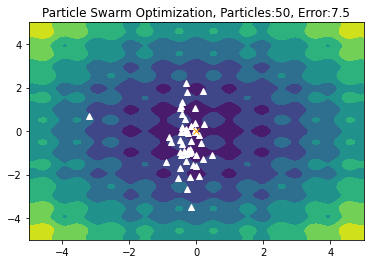

ERROR-------> 11.790686641698343
global_best_position 11.790686641698343 -1
ERROR-------> 3.561263316246032
global_best_position 3.561263316246032 11.790686641698343
ERROR-------> 19.61995500746594
global_best_position 19.61995500746594 3.561263316246032
ERROR-------> 12.010806162050374
global_best_position 12.010806162050374 3.561263316246032
ERROR-------> 1.876169542711061
global_best_position 1.876169542711061 3.561263316246032
ERROR-------> 7.23902633770882
global_best_position 7.23902633770882 1.876169542711061
ERROR-------> 2.8727415036671755
global_best_position 2.8727415036671755 1.876169542711061
ERROR-------> 7.465634323503041
global_best_position 7.465634323503041 1.876169542711061
ERROR-------> 4.6685945358957355
global_best_position 4.6685945358957355 1.876169542711061
ERROR-------> 8.861357704745542
global_best_position 8.861357704745542 1.876169542711061
ERROR-------> 13.15276986365005
global_best_position 13.15276986365005 1.876169542711061
ERROR-------> 15.024689515381

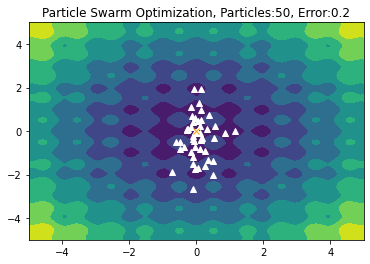

ERROR-------> 5.272799325615636
global_best_position 5.272799325615636 0.15175825575166346
ERROR-------> 7.2507971175858685
global_best_position 7.2507971175858685 -1
ERROR-------> 4.240556701258662
global_best_position 4.240556701258662 -1
ERROR-------> 6.960829008262834
global_best_position 6.960829008262834 -1
ERROR-------> 10.292982061972525
global_best_position 10.292982061972525 -1
ERROR-------> 2.1319817348886216
global_best_position 2.1319817348886216 -1
ERROR-------> 2.750909189503065
global_best_position 2.750909189503065 -1
ERROR-------> 5.3661953710074854
global_best_position 5.3661953710074854 -1
ERROR-------> 6.705248481769886
global_best_position 6.705248481769886 -1
ERROR-------> 8.650248581006213
global_best_position 8.650248581006213 -1
ERROR-------> 12.496218502321803
global_best_position 12.496218502321803 -1
ERROR-------> 5.341104514091951
global_best_position 5.341104514091951 -1
ERROR-------> 5.4512145541858645
global_best_position 5.4512145541858645 -1
ERROR----

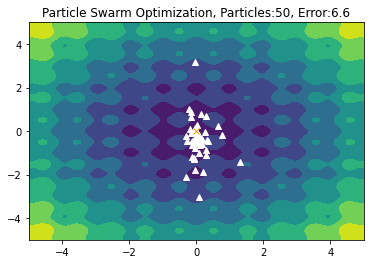

ERROR-------> 8.743566955761757
global_best_position 8.743566955761757 -1
ERROR-------> 0.4031631472321635
global_best_position 0.4031631472321635 8.743566955761757
ERROR-------> 12.287231890346419
global_best_position 12.287231890346419 0.4031631472321635
ERROR-------> 6.663465138114655
global_best_position 6.663465138114655 0.4031631472321635
ERROR-------> 5.468032449457258
global_best_position 5.468032449457258 0.4031631472321635
ERROR-------> 3.334704624391925
global_best_position 3.334704624391925 0.4031631472321635
ERROR-------> 6.330424908019005
global_best_position 6.330424908019005 0.4031631472321635
ERROR-------> 5.695058192769892
global_best_position 5.695058192769892 0.4031631472321635
ERROR-------> 6.412812110020551
global_best_position 6.412812110020551 0.4031631472321635
ERROR-------> 8.067930072075114
global_best_position 8.067930072075114 0.4031631472321635
ERROR-------> 3.0744161312959672
global_best_position 3.0744161312959672 0.4031631472321635
ERROR-------> 3.87077

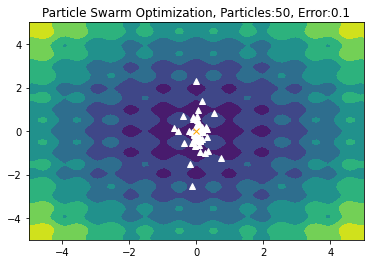

ERROR-------> 5.769283650209159
global_best_position 5.769283650209159 0.050713390145357806
ERROR-------> 5.1366127309219625
global_best_position 5.1366127309219625 -1
ERROR-------> 9.15389525531035
global_best_position 9.15389525531035 -1
ERROR-------> 5.500799986400306
global_best_position 5.500799986400306 -1
ERROR-------> 10.316900150147998
global_best_position 10.316900150147998 -1
ERROR-------> 7.3153072670006045
global_best_position 7.3153072670006045 -1
ERROR-------> 6.794656867237817
global_best_position 6.794656867237817 -1
ERROR-------> 3.9487015114215263
global_best_position 3.9487015114215263 -1
ERROR-------> 6.266832320638567
global_best_position 6.266832320638567 -1
ERROR-------> 11.488602986706258
global_best_position 11.488602986706258 -1
ERROR-------> 8.569958559238213
global_best_position 8.569958559238213 -1
ERROR-------> 4.6612451565447515
global_best_position 4.6612451565447515 -1
ERROR-------> 3.8936603718283576
global_best_position 3.8936603718283576 -1
ERROR---

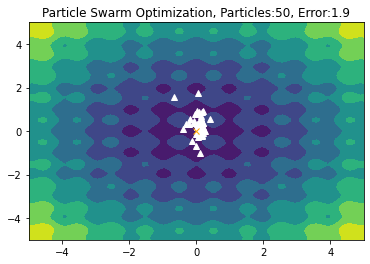

ERROR-------> 2.5557625448766155
global_best_position 2.5557625448766155 -1
ERROR-------> 5.116448817029385
global_best_position 5.116448817029385 2.5557625448766155
ERROR-------> 5.867627651196633
global_best_position 5.867627651196633 2.5557625448766155
ERROR-------> 3.299005909664053
global_best_position 3.299005909664053 2.5557625448766155
ERROR-------> 1.044572858346914
global_best_position 1.044572858346914 2.5557625448766155
ERROR-------> 7.299061224259717
global_best_position 7.299061224259717 1.044572858346914
ERROR-------> 2.186950964583283
global_best_position 2.186950964583283 1.044572858346914
ERROR-------> 2.7598215898155556
global_best_position 2.7598215898155556 1.044572858346914
ERROR-------> 4.043192595164608
global_best_position 4.043192595164608 1.044572858346914
ERROR-------> 4.52051249642438
global_best_position 4.52051249642438 1.044572858346914
ERROR-------> 0.6571463389854699
global_best_position 0.6571463389854699 1.044572858346914
ERROR-------> 0.515000004011

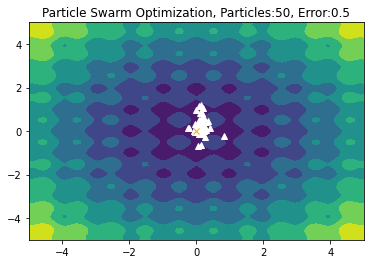

ERROR-------> 0.34201518592862357
global_best_position 0.34201518592862357 0.5150000040113127
ERROR-------> 2.977714425335579
global_best_position 2.977714425335579 -1
ERROR-------> 2.618423833815207
global_best_position 2.618423833815207 -1
ERROR-------> 1.1308040449335204
global_best_position 1.1308040449335204 -1
ERROR-------> 6.712673697920649
global_best_position 6.712673697920649 -1
ERROR-------> 6.691892991901812
global_best_position 6.691892991901812 -1
ERROR-------> 7.5632610930435655
global_best_position 7.5632610930435655 -1
ERROR-------> 3.095809143666179
global_best_position 3.095809143666179 -1
ERROR-------> 2.362016923442532
global_best_position 2.362016923442532 -1
ERROR-------> 11.09407390602586
global_best_position 11.09407390602586 -1
ERROR-------> 5.007749315346979
global_best_position 5.007749315346979 -1
ERROR-------> 6.890032570982562
global_best_position 6.890032570982562 -1
ERROR-------> 0.8154650906873719
global_best_position 0.8154650906873719 -1
ERROR-------

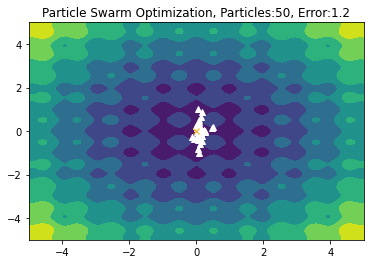

ERROR-------> 3.093791906424974
global_best_position 3.093791906424974 -1
ERROR-------> 3.4951359308914416
global_best_position 3.4951359308914416 3.093791906424974
ERROR-------> 1.2891770677025374
global_best_position 1.2891770677025374 3.093791906424974
ERROR-------> 1.106042995538461
global_best_position 1.106042995538461 1.2891770677025374
ERROR-------> 3.0744756272859757
global_best_position 3.0744756272859757 1.106042995538461
ERROR-------> 2.240589144656168
global_best_position 2.240589144656168 1.106042995538461
ERROR-------> 0.7668304581389389
global_best_position 0.7668304581389389 1.106042995538461
ERROR-------> 3.1151608333815943
global_best_position 3.1151608333815943 0.7668304581389389
ERROR-------> 2.8492779661850265
global_best_position 2.8492779661850265 0.7668304581389389
ERROR-------> 1.195939265005677
global_best_position 1.195939265005677 0.7668304581389389
ERROR-------> 2.3524531558265944
global_best_position 2.3524531558265944 0.7668304581389389
ERROR-------> 1.0

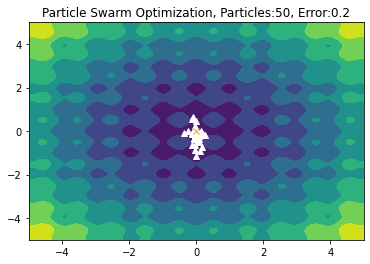

ERROR-------> 0.22889208034646646
global_best_position 0.22889208034646646 0.19013854780382466
ERROR-------> 4.998711426342635
global_best_position 4.998711426342635 -1
ERROR-------> 6.514729337868511
global_best_position 6.514729337868511 -1
ERROR-------> 0.5501296012453718
global_best_position 0.5501296012453718 -1
ERROR-------> 6.315598422781236
global_best_position 6.315598422781236 -1
ERROR-------> 0.27290859549518043
global_best_position 0.27290859549518043 -1
ERROR-------> 2.7466521188078596
global_best_position 2.7466521188078596 -1
ERROR-------> 5.552367164622629
global_best_position 5.552367164622629 -1
ERROR-------> 0.26143437623549026
global_best_position 0.26143437623549026 -1
ERROR-------> 7.215019488121854
global_best_position 7.215019488121854 -1
ERROR-------> 6.188630400189398
global_best_position 6.188630400189398 -1
ERROR-------> 1.6274888463235353
global_best_position 1.6274888463235353 -1
ERROR-------> 0.41698316023228443
global_best_position 0.41698316023228443 -1

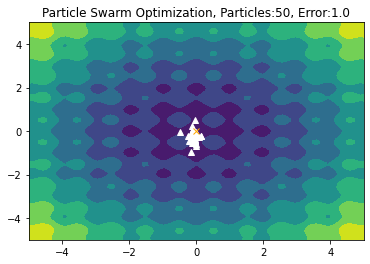

ERROR-------> 4.033612237629633
global_best_position 4.033612237629633 -1
ERROR-------> 3.8581865350323206
global_best_position 3.8581865350323206 4.033612237629633
ERROR-------> 6.365078633881426
global_best_position 6.365078633881426 3.8581865350323206
ERROR-------> 1.610213716805566
global_best_position 1.610213716805566 3.8581865350323206
ERROR-------> 2.385641690334076
global_best_position 2.385641690334076 1.610213716805566
ERROR-------> 1.3890458501839449
global_best_position 1.3890458501839449 1.610213716805566
ERROR-------> 4.814728197230016
global_best_position 4.814728197230016 1.3890458501839449
ERROR-------> 1.5986147812640414
global_best_position 1.5986147812640414 1.3890458501839449
ERROR-------> 0.08605515300089728
global_best_position 0.08605515300089728 1.3890458501839449
ERROR-------> 3.8772212717670604
global_best_position 3.8772212717670604 0.08605515300089728
ERROR-------> 6.308728822120706
global_best_position 6.308728822120706 0.08605515300089728
ERROR-------> 3

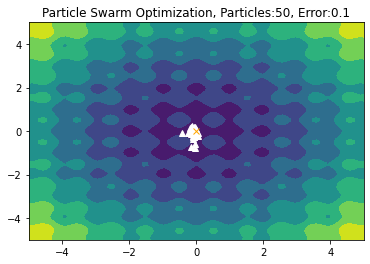

ERROR-------> 0.03278892526280153
global_best_position 0.03278892526280153 0.08605515300089728
ERROR-------> 0.03989408741387823
global_best_position 0.03989408741387823 -1
ERROR-------> 0.8907442415968791
global_best_position 0.8907442415968791 -1
ERROR-------> 0.4690790913282239
global_best_position 0.4690790913282239 -1
ERROR-------> 3.39467345090961
global_best_position 3.39467345090961 -1
ERROR-------> 0.8120040643974047
global_best_position 0.8120040643974047 -1
ERROR-------> 0.6916658348692275
global_best_position 0.6916658348692275 -1
ERROR-------> 2.282945298672767
global_best_position 2.282945298672767 -1
ERROR-------> 0.21166320297022168
global_best_position 0.21166320297022168 -1
ERROR-------> 5.811596166656907
global_best_position 5.811596166656907 -1
ERROR-------> 0.20401469846213693
global_best_position 0.20401469846213693 -1
ERROR-------> 0.3557912685977467
global_best_position 0.3557912685977467 -1
ERROR-------> 0.9390685387821396
global_best_position 0.939068538782139

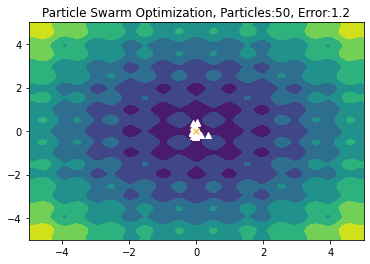

ERROR-------> 0.31369169190085344
global_best_position 0.31369169190085344 -1
ERROR-------> 1.24870502417102
global_best_position 1.24870502417102 0.31369169190085344
ERROR-------> 0.21723327539485737
global_best_position 0.21723327539485737 0.31369169190085344
ERROR-------> 0.2553772236762164
global_best_position 0.2553772236762164 0.21723327539485737
ERROR-------> 5.0288103910242175
global_best_position 5.0288103910242175 0.21723327539485737
ERROR-------> 1.394569830827221
global_best_position 1.394569830827221 0.21723327539485737
ERROR-------> 0.13827723509383372
global_best_position 0.13827723509383372 0.21723327539485737
ERROR-------> 0.009143893108069179
global_best_position 0.009143893108069179 0.13827723509383372
ERROR-------> 1.4549562092710753
global_best_position 1.4549562092710753 0.009143893108069179
ERROR-------> 3.1264321883202757
global_best_position 3.1264321883202757 0.009143893108069179
ERROR-------> 3.8221253113657356
global_best_position 3.8221253113657356 0.009143

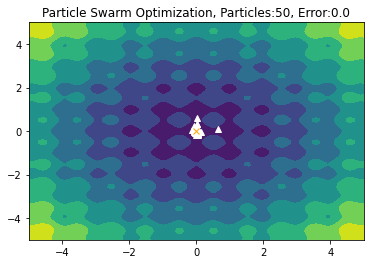

ERROR-------> 0.0619481624205136
global_best_position 0.0619481624205136 0.009143893108069179
ERROR-------> 0.3734056534210799
global_best_position 0.3734056534210799 -1
ERROR-------> 0.8330619329460287
global_best_position 0.8330619329460287 -1
ERROR-------> 0.030726660707948383
global_best_position 0.030726660707948383 -1
ERROR-------> 4.314967342858716
global_best_position 4.314967342858716 -1
ERROR-------> 0.8811856094132988
global_best_position 0.8811856094132988 -1
ERROR-------> 0.12216827738169034
global_best_position 0.12216827738169034 -1
ERROR-------> 0.43944974996743547
global_best_position 0.43944974996743547 -1
ERROR-------> 0.8194483346557089
global_best_position 0.8194483346557089 -1
ERROR-------> 1.507197904090317
global_best_position 1.507197904090317 -1
ERROR-------> 0.7882104453202441
global_best_position 0.7882104453202441 -1
ERROR-------> 0.05220072967154721
global_best_position 0.05220072967154721 -1
ERROR-------> 0.04808951327880617
global_best_position 0.0480895

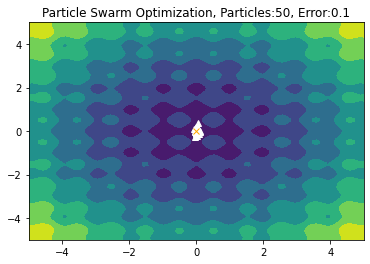

ERROR-------> 0.11881511123355981
global_best_position 0.11881511123355981 -1
ERROR-------> 0.16236475324137079
global_best_position 0.16236475324137079 0.11881511123355981
ERROR-------> 0.3318928301121815
global_best_position 0.3318928301121815 0.11881511123355981
ERROR-------> 0.4028202763118127
global_best_position 0.4028202763118127 0.11881511123355981
ERROR-------> 1.847508641617564
global_best_position 1.847508641617564 0.11881511123355981
ERROR-------> 0.37473598412977527
global_best_position 0.37473598412977527 0.11881511123355981
ERROR-------> 0.3439275552173351
global_best_position 0.3439275552173351 0.11881511123355981
ERROR-------> 0.8896617514999239
global_best_position 0.8896617514999239 0.11881511123355981
ERROR-------> 0.17642397556451428
global_best_position 0.17642397556451428 0.11881511123355981
ERROR-------> 1.159519817924652
global_best_position 1.159519817924652 0.11881511123355981
ERROR-------> 0.43741849387333787
global_best_position 0.43741849387333787 0.118815

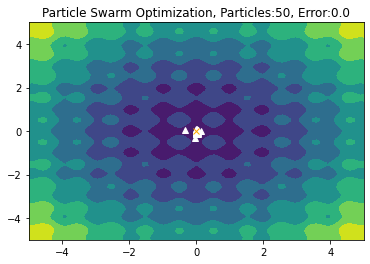

ERROR-------> 0.09025524356353287
global_best_position 0.09025524356353287 0.0007969790734012605
ERROR-------> 0.08103473562842467
global_best_position 0.08103473562842467 -1
ERROR-------> 0.15997803020510482
global_best_position 0.15997803020510482 -1
ERROR-------> 0.15632136006028752
global_best_position 0.15632136006028752 -1
ERROR-------> 0.006826534216259006
global_best_position 0.006826534216259006 -1
ERROR-------> 0.035821328126974805
global_best_position 0.035821328126974805 -1
ERROR-------> 0.32744392142310996
global_best_position 0.32744392142310996 -1
ERROR-------> 0.011227469064972517
global_best_position 0.011227469064972517 -1
ERROR-------> 0.2997536768286073
global_best_position 0.2997536768286073 -1
ERROR-------> 0.7862576893825661
global_best_position 0.7862576893825661 -1
ERROR-------> 0.6670683625256739
global_best_position 0.6670683625256739 -1
ERROR-------> 0.017208829091893918
global_best_position 0.017208829091893918 -1
ERROR-------> 0.01691042759813932
global_be

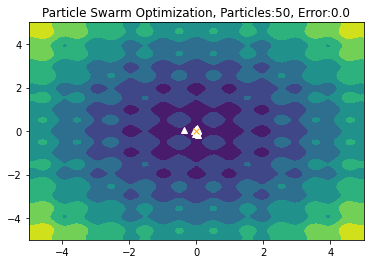

ERROR-------> 0.1975452304642129
global_best_position 0.1975452304642129 -1
ERROR-------> 0.1749554627344878
global_best_position 0.1749554627344878 0.1975452304642129
ERROR-------> 0.2275936146554951
global_best_position 0.2275936146554951 0.1749554627344878
ERROR-------> 0.21762681134699324
global_best_position 0.21762681134699324 0.1749554627344878
ERROR-------> 0.3553255771002979
global_best_position 0.3553255771002979 0.1749554627344878
ERROR-------> 0.2496773694298451
global_best_position 0.2496773694298451 0.1749554627344878
ERROR-------> 0.037241520846015064
global_best_position 0.037241520846015064 0.1749554627344878
ERROR-------> 0.30522955876985947
global_best_position 0.30522955876985947 0.037241520846015064
ERROR-------> 0.11306332337146419
global_best_position 0.11306332337146419 0.037241520846015064
ERROR-------> 1.2434921071079152
global_best_position 1.2434921071079152 0.037241520846015064
ERROR-------> 0.1075416112442813
global_best_position 0.1075416112442813 0.03724

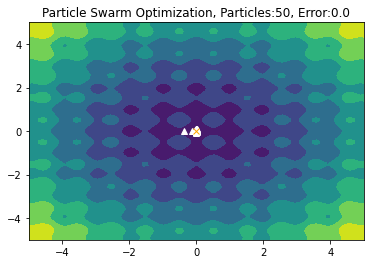

ERROR-------> 0.5606501721769099
global_best_position 0.5606501721769099 0.0033284837403053658
ERROR-------> 0.05663517494381942
global_best_position 0.05663517494381942 -1
ERROR-------> 0.07441276786215134
global_best_position 0.07441276786215134 -1
ERROR-------> 0.008002941793500362
global_best_position 0.008002941793500362 -1
ERROR-------> 0.07942754356312243
global_best_position 0.07942754356312243 -1
ERROR-------> 0.21467801112406715
global_best_position 0.21467801112406715 -1
ERROR-------> 0.04834056338893511
global_best_position 0.04834056338893511 -1
ERROR-------> 0.5635613840515878
global_best_position 0.5635613840515878 -1
ERROR-------> 0.07182849246757428
global_best_position 0.07182849246757428 -1
ERROR-------> 0.15157920766168154
global_best_position 0.15157920766168154 -1
ERROR-------> 0.022214755302590206
global_best_position 0.022214755302590206 -1
ERROR-------> 0.0010873417291836773
global_best_position 0.0010873417291836773 -1
ERROR-------> 0.005686395237040287
global

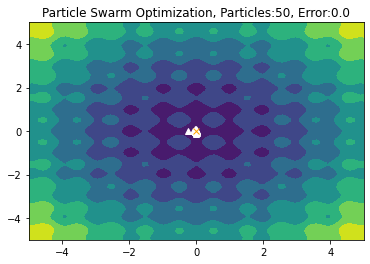

ERROR-------> 0.14861554700612345
global_best_position 0.14861554700612345 -1
ERROR-------> 0.247709943606087
global_best_position 0.247709943606087 0.14861554700612345
ERROR-------> 0.06393148226821133
global_best_position 0.06393148226821133 0.14861554700612345
ERROR-------> 0.09857300141220193
global_best_position 0.09857300141220193 0.06393148226821133
ERROR-------> 0.09512538034785845
global_best_position 0.09512538034785845 0.06393148226821133
ERROR-------> 0.2925585652804523
global_best_position 0.2925585652804523 0.06393148226821133
ERROR-------> 0.0039859679038425355
global_best_position 0.0039859679038425355 0.06393148226821133
ERROR-------> 0.28893391417756753
global_best_position 0.28893391417756753 0.0039859679038425355
ERROR-------> 0.08141184406032131
global_best_position 0.08141184406032131 0.0039859679038425355
ERROR-------> 0.23517574590807566
global_best_position 0.23517574590807566 0.0039859679038425355
ERROR-------> 0.11274224294876056
global_best_position 0.112742

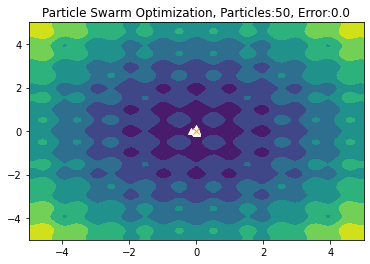

ERROR-------> 0.5323050961847517
global_best_position 0.5323050961847517 0.0025348310224506676
ERROR-------> 0.010783642306351204
global_best_position 0.010783642306351204 -1
ERROR-------> 0.11836859334752248
global_best_position 0.11836859334752248 -1
ERROR-------> 0.026620379193577293
global_best_position 0.026620379193577293 -1
ERROR-------> 0.08551096244320266
global_best_position 0.08551096244320266 -1
ERROR-------> 0.3528559512274869
global_best_position 0.3528559512274869 -1
ERROR-------> 0.013642388384893955
global_best_position 0.013642388384893955 -1
ERROR-------> 0.3105764109213389
global_best_position 0.3105764109213389 -1
ERROR-------> 0.0623074789061242
global_best_position 0.0623074789061242 -1
ERROR-------> 0.020070078505925792
global_best_position 0.020070078505925792 -1
ERROR-------> 0.03932696391703239
global_best_position 0.03932696391703239 -1
ERROR-------> 0.047439184031521364
global_best_position 0.047439184031521364 -1
ERROR-------> 0.035670160086325176
global_b

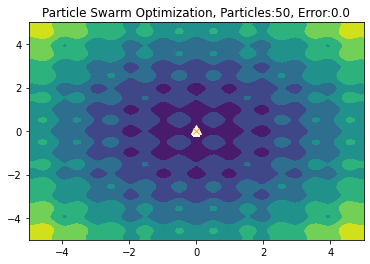

ERROR-------> 0.702215948098944
global_best_position 0.702215948098944 -1
ERROR-------> 0.047923596480262454
global_best_position 0.047923596480262454 0.702215948098944
ERROR-------> 0.0302132874979133
global_best_position 0.0302132874979133 0.047923596480262454
ERROR-------> 0.033224788760662705
global_best_position 0.033224788760662705 0.0302132874979133
ERROR-------> 0.1962695157204335
global_best_position 0.1962695157204335 0.0302132874979133
ERROR-------> 0.00647030188008646
global_best_position 0.00647030188008646 0.0302132874979133
ERROR-------> 0.06889381120325666
global_best_position 0.06889381120325666 0.00647030188008646
ERROR-------> 0.1960692697199038
global_best_position 0.1960692697199038 0.00647030188008646
ERROR-------> 0.023015641389942054
global_best_position 0.023015641389942054 0.00647030188008646
ERROR-------> 0.1833764953425252
global_best_position 0.1833764953425252 0.00647030188008646
ERROR-------> 0.03238846975329146
global_best_position 0.03238846975329146 0.

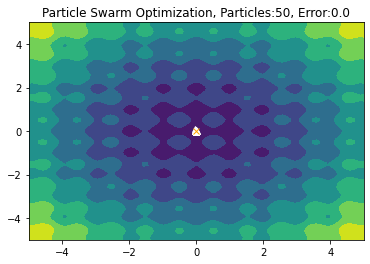

ERROR-------> 0.06679307725144135
global_best_position 0.06679307725144135 0.005114551419604929
ERROR-------> 0.016305737620363914
global_best_position 0.016305737620363914 -1
ERROR-------> 0.03268701734584578
global_best_position 0.03268701734584578 -1
ERROR-------> 0.025387375370232945
global_best_position 0.025387375370232945 -1
ERROR-------> 0.20462063269605313
global_best_position 0.20462063269605313 -1
ERROR-------> 0.09452123895897913
global_best_position 0.09452123895897913 -1
ERROR-------> 0.0297796413390774
global_best_position 0.0297796413390774 -1
ERROR-------> 0.09199571544061058
global_best_position 0.09199571544061058 -1
ERROR-------> 0.029641869967868217
global_best_position 0.029641869967868217 -1
ERROR-------> 0.07626877142703936
global_best_position 0.07626877142703936 -1
ERROR-------> 0.035002585670158126
global_best_position 0.035002585670158126 -1
ERROR-------> 0.027393794298633978
global_best_position 0.027393794298633978 -1
ERROR-------> 0.005101078416847926
glo

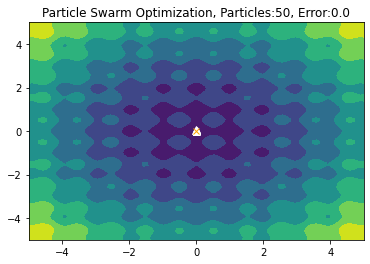

ERROR-------> 0.3312409293040446
global_best_position 0.3312409293040446 -1
ERROR-------> 0.008134734971772417
global_best_position 0.008134734971772417 0.3312409293040446
ERROR-------> 0.032462266934419226
global_best_position 0.032462266934419226 0.008134734971772417
ERROR-------> 0.0010607106732916094
global_best_position 0.0010607106732916094 0.008134734971772417
ERROR-------> 0.11077072475160055
global_best_position 0.11077072475160055 0.0010607106732916094
ERROR-------> 0.0380921105363905
global_best_position 0.0380921105363905 0.0010607106732916094
ERROR-------> 0.03773969874104921
global_best_position 0.03773969874104921 0.0010607106732916094
ERROR-------> 0.13015524089343344
global_best_position 0.13015524089343344 0.0010607106732916094
ERROR-------> 0.03945973203078257
global_best_position 0.03945973203078257 0.0010607106732916094
ERROR-------> 0.0003935839937661001
global_best_position 0.0003935839937661001 0.0010607106732916094
ERROR-------> 0.00814661093695701
global_best_

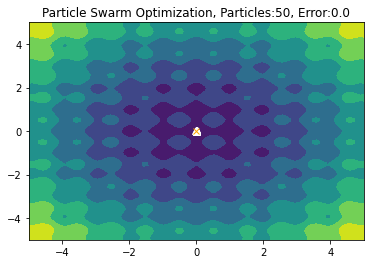

ERROR-------> 0.28930697726895005
global_best_position 0.28930697726895005 0.00012644013178508828
ERROR-------> 0.006157105523380224
global_best_position 0.006157105523380224 -1
ERROR-------> 0.010335509659234354
global_best_position 0.010335509659234354 -1
ERROR-------> 0.011118517938602857
global_best_position 0.011118517938602857 -1
ERROR-------> 0.06515112777357324
global_best_position 0.06515112777357324 -1
ERROR-------> 0.05886263215990084
global_best_position 0.05886263215990084 -1
ERROR-------> 0.02842336375928145
global_best_position 0.02842336375928145 -1
ERROR-------> 0.02123832280995419
global_best_position 0.02123832280995419 -1
ERROR-------> 0.01605058961702177
global_best_position 0.01605058961702177 -1
ERROR-------> 0.012793868158748722
global_best_position 0.012793868158748722 -1
ERROR-------> 0.007188685325564492
global_best_position 0.007188685325564492 -1
ERROR-------> 0.006566941388609138
global_best_position 0.006566941388609138 -1
ERROR-------> 0.0039111152433974

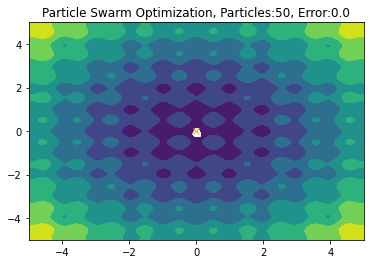

ERROR-------> 0.16636758779249483
global_best_position 0.16636758779249483 -1
ERROR-------> 0.005090728389209431
global_best_position 0.005090728389209431 0.16636758779249483
ERROR-------> 0.005807774645234076
global_best_position 0.005807774645234076 0.005090728389209431
ERROR-------> 0.004439425421952414
global_best_position 0.004439425421952414 0.005090728389209431
ERROR-------> 0.021761176076349642
global_best_position 0.021761176076349642 0.004439425421952414
ERROR-------> 0.06633133698542615
global_best_position 0.06633133698542615 0.004439425421952414
ERROR-------> 0.010100386568934638
global_best_position 0.010100386568934638 0.004439425421952414
ERROR-------> 0.03142675285003893
global_best_position 0.03142675285003893 0.004439425421952414
ERROR-------> 0.013823134028122297
global_best_position 0.013823134028122297 0.004439425421952414
ERROR-------> 0.011866812956753847
global_best_position 0.011866812956753847 0.004439425421952414
ERROR-------> 0.021343573341527033
global_bes

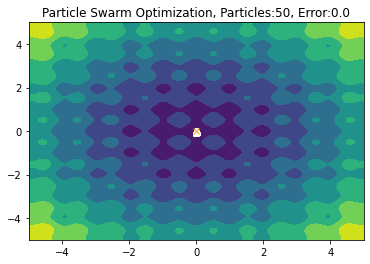

ERROR-------> 0.301815805514444
global_best_position 0.301815805514444 0.0005415740882854791
ERROR-------> 0.002333121040177133
global_best_position 0.002333121040177133 -1
ERROR-------> 0.0030474859695388545
global_best_position 0.0030474859695388545 -1
ERROR-------> 0.004393959505135214
global_best_position 0.004393959505135214 -1
ERROR-------> 0.005277160192593833
global_best_position 0.005277160192593833 -1
ERROR-------> 0.016689269330894874
global_best_position 0.016689269330894874 -1
ERROR-------> 0.0022684433696182893
global_best_position 0.0022684433696182893 -1
ERROR-------> 0.004386994599526517
global_best_position 0.004386994599526517 -1
ERROR-------> 0.0018198091550658546
global_best_position 0.0018198091550658546 -1
ERROR-------> 0.003639469671488982
global_best_position 0.003639469671488982 -1
ERROR-------> 0.002474960196054532
global_best_position 0.002474960196054532 -1
ERROR-------> 7.819658717878042e-06
global_best_position 7.819658717878042e-06 -1
ERROR-------> 0.000

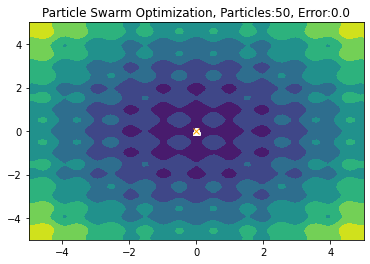

ERROR-------> 0.010066146886644312
global_best_position 0.010066146886644312 -1
ERROR-------> 0.003579439953599106
global_best_position 0.003579439953599106 0.010066146886644312
ERROR-------> 0.0034819132151469034
global_best_position 0.0034819132151469034 0.003579439953599106
ERROR-------> 0.0026476197456668515
global_best_position 0.0026476197456668515 0.0034819132151469034
ERROR-------> 0.010237951644873178
global_best_position 0.010237951644873178 0.0026476197456668515
ERROR-------> 0.00017127140814210406
global_best_position 0.00017127140814210406 0.0026476197456668515
ERROR-------> 0.003968520422304778
global_best_position 0.003968520422304778 0.00017127140814210406
ERROR-------> 0.007692643547686728
global_best_position 0.007692643547686728 0.00017127140814210406
ERROR-------> 0.0026031255907490447
global_best_position 0.0026031255907490447 0.00017127140814210406
ERROR-------> 0.0019029689238045933
global_best_position 0.0019029689238045933 0.00017127140814210406
ERROR-------> 0

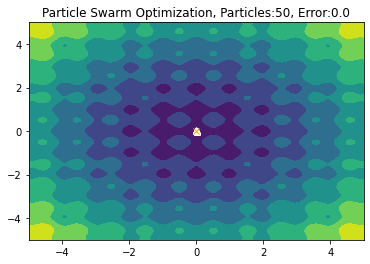

ERROR-------> 0.1389643691883773
global_best_position 0.1389643691883773 0.00017127140814210406
ERROR-------> 5.048964422549318e-05
global_best_position 5.048964422549318e-05 -1
ERROR-------> 0.0011608913136882393
global_best_position 0.0011608913136882393 -1
ERROR-------> 0.003040478999854379
global_best_position 0.003040478999854379 -1
ERROR-------> 0.0006668709519193072
global_best_position 0.0006668709519193072 -1
ERROR-------> 0.00582547894844776
global_best_position 0.00582547894844776 -1
ERROR-------> 0.0001640168694940769
global_best_position 0.0001640168694940769 -1
ERROR-------> 4.190944348003711e-06
global_best_position 4.190944348003711e-06 -1
ERROR-------> 0.0001798005840889516
global_best_position 0.0001798005840889516 -1
ERROR-------> 0.0002816486309109578
global_best_position 0.0002816486309109578 -1
ERROR-------> 0.024253665378331846
global_best_position 0.024253665378331846 -1
ERROR-------> 0.0013445997471830395
global_best_position 0.0013445997471830395 -1
ERROR-----

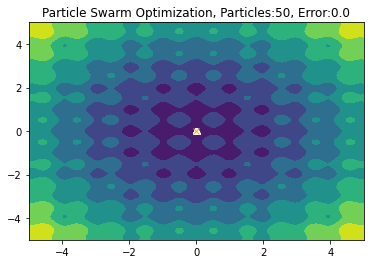

ERROR-------> 0.03157838402432667
global_best_position 0.03157838402432667 -1
ERROR-------> 0.0024540262730017304
global_best_position 0.0024540262730017304 0.03157838402432667
ERROR-------> 0.002038876417865154
global_best_position 0.002038876417865154 0.0024540262730017304
ERROR-------> 0.003639246096678761
global_best_position 0.003639246096678761 0.002038876417865154
ERROR-------> 0.0056039708282487055
global_best_position 0.0056039708282487055 0.002038876417865154
ERROR-------> 0.01140661340227922
global_best_position 0.01140661340227922 0.002038876417865154
ERROR-------> 3.1008385830588736e-05
global_best_position 3.1008385830588736e-05 0.002038876417865154
ERROR-------> 0.0016026788072682763
global_best_position 0.0016026788072682763 3.1008385830588736e-05
ERROR-------> 0.0024781198093837276
global_best_position 0.0024781198093837276 3.1008385830588736e-05
ERROR-------> 0.0009709460508187107
global_best_position 0.0009709460508187107 3.1008385830588736e-05
ERROR-------> 0.000831

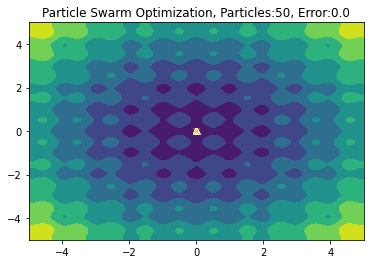

ERROR-------> 0.003986951582516163
global_best_position 0.003986951582516163 1.2589824589070986e-05
ERROR-------> 0.005355624427497929
global_best_position 0.005355624427497929 -1
ERROR-------> 0.0006854270082712333
global_best_position 0.0006854270082712333 -1
ERROR-------> 0.00019793725322436728
global_best_position 0.00019793725322436728 -1
ERROR-------> 0.000796148000283381
global_best_position 0.000796148000283381 -1
ERROR-------> 0.00585179658641799
global_best_position 0.00585179658641799 -1
ERROR-------> 0.00016145273701440033
global_best_position 0.00016145273701440033 -1
ERROR-------> 7.951149817664316e-05
global_best_position 7.951149817664316e-05 -1
ERROR-------> 0.004755686978787921
global_best_position 0.004755686978787921 -1
ERROR-------> 0.000241877853057737
global_best_position 0.000241877853057737 -1
ERROR-------> 0.007088196147940096
global_best_position 0.007088196147940096 -1
ERROR-------> 0.00020396067844075105
global_best_position 0.00020396067844075105 -1
ERROR-

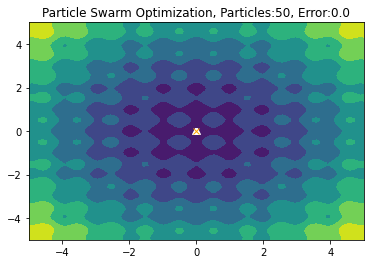

ERROR-------> 0.006613311446383108
global_best_position 0.006613311446383108 -1
ERROR-------> 0.006930057338500717
global_best_position 0.006930057338500717 0.006613311446383108
ERROR-------> 0.0016360331582756515
global_best_position 0.0016360331582756515 0.006613311446383108
ERROR-------> 0.00595807624388911
global_best_position 0.00595807624388911 0.0016360331582756515
ERROR-------> 0.00019463113997808534
global_best_position 0.00019463113997808534 0.0016360331582756515
ERROR-------> 0.012257619766250727
global_best_position 0.012257619766250727 0.00019463113997808534
ERROR-------> 0.004137644874717239
global_best_position 0.004137644874717239 0.00019463113997808534
ERROR-------> 0.005861959731470634
global_best_position 0.005861959731470634 0.00019463113997808534
ERROR-------> 0.0008374515840872121
global_best_position 0.0008374515840872121 0.00019463113997808534
ERROR-------> 0.0010316137487595967
global_best_position 0.0010316137487595967 0.00019463113997808534
ERROR-------> 0.01

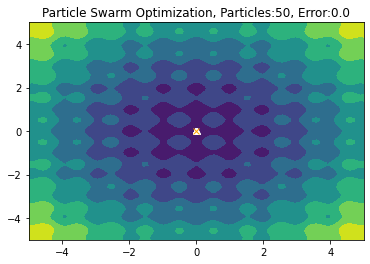

ERROR-------> 0.0016409355866287
global_best_position 0.0016409355866287 0.00019463113997808534
ERROR-------> 0.0013796810325494846
global_best_position 0.0013796810325494846 -1
ERROR-------> 0.0020728861900449758
global_best_position 0.0020728861900449758 -1
ERROR-------> 0.004011381823890048
global_best_position 0.004011381823890048 -1
ERROR-------> 0.0002954922589335496
global_best_position 0.0002954922589335496 -1
ERROR-------> 0.001517701220581813
global_best_position 0.001517701220581813 -1
ERROR-------> 0.0003900271585681736
global_best_position 0.0003900271585681736 -1
ERROR-------> 0.005821298909069128
global_best_position 0.005821298909069128 -1
ERROR-------> 0.0008668096591168961
global_best_position 0.0008668096591168961 -1
ERROR-------> 0.0009845432486255135
global_best_position 0.0009845432486255135 -1
ERROR-------> 0.005716801809599659
global_best_position 0.005716801809599659 -1
ERROR-------> 0.0005493104471518961
global_best_position 0.0005493104471518961 -1
ERROR-----

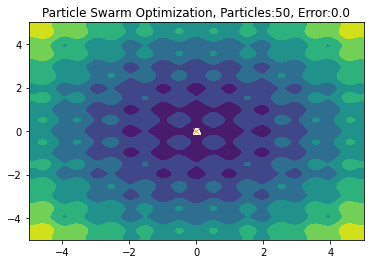

ERROR-------> 0.0004608628246955959
global_best_position 0.0004608628246955959 -1
ERROR-------> 0.000544231204919754
global_best_position 0.000544231204919754 0.0004608628246955959
ERROR-------> 0.0003839089516723959
global_best_position 0.0003839089516723959 0.0004608628246955959
ERROR-------> 0.0005481689274109414
global_best_position 0.0005481689274109414 0.0003839089516723959
ERROR-------> 0.00025633918065981476
global_best_position 0.00025633918065981476 0.0003839089516723959
ERROR-------> 0.0014491863365115876
global_best_position 0.0014491863365115876 0.00025633918065981476
ERROR-------> 0.0038432894839619536
global_best_position 0.0038432894839619536 0.00025633918065981476
ERROR-------> 0.004624699294804913
global_best_position 0.004624699294804913 0.00025633918065981476
ERROR-------> 0.0007612700227301872
global_best_position 0.0007612700227301872 0.00025633918065981476
ERROR-------> 0.0006176769456249787
global_best_position 0.0006176769456249787 0.00025633918065981476
ERROR-

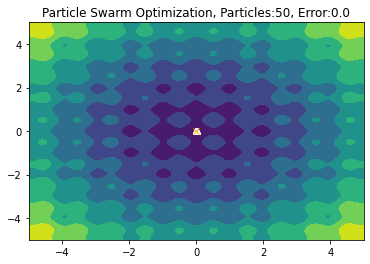

ERROR-------> 0.000448814871503167
global_best_position 0.000448814871503167 0.00021704169352787517
ERROR-------> 0.0001479273946056736
global_best_position 0.0001479273946056736 -1
ERROR-------> 0.0002833279380363152
global_best_position 0.0002833279380363152 -1
ERROR-------> 0.0013673137687604253
global_best_position 0.0013673137687604253 -1
ERROR-------> 0.00011638918508971585
global_best_position 0.00011638918508971585 -1
ERROR-------> 0.0027298223677520994
global_best_position 0.0027298223677520994 -1
ERROR-------> 0.004148600761678445
global_best_position 0.004148600761678445 -1
ERROR-------> 0.015434042967633843
global_best_position 0.015434042967633843 -1
ERROR-------> 0.00011452023993108185
global_best_position 0.00011452023993108185 -1
ERROR-------> 0.0011084485524497367
global_best_position 0.0011084485524497367 -1
ERROR-------> 8.276652918937089e-05
global_best_position 8.276652918937089e-05 -1
ERROR-------> 0.0096543890331926
global_best_position 0.0096543890331926 -1
ERRO

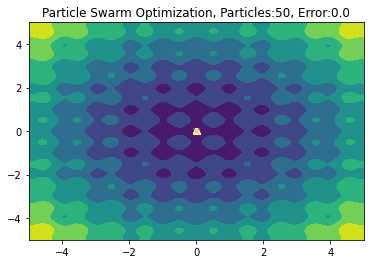

ERROR-------> 0.0021211222771047034
global_best_position 0.0021211222771047034 -1
ERROR-------> 0.0032498069142992136
global_best_position 0.0032498069142992136 0.0021211222771047034
ERROR-------> 0.003526198098006361
global_best_position 0.003526198098006361 0.0021211222771047034
ERROR-------> 0.0016586029041114614
global_best_position 0.0016586029041114614 0.0021211222771047034
ERROR-------> 0.0021768196774001325
global_best_position 0.0021768196774001325 0.0016586029041114614
ERROR-------> 0.0024063538238774385
global_best_position 0.0024063538238774385 0.0016586029041114614
ERROR-------> 0.0013637347219059848
global_best_position 0.0013637347219059848 0.0016586029041114614
ERROR-------> 0.004134485280592237
global_best_position 0.004134485280592237 0.0013637347219059848
ERROR-------> 0.0008812153253003885
global_best_position 0.0008812153253003885 0.0013637347219059848
ERROR-------> 0.0015835273201778577
global_best_position 0.0015835273201778577 0.0008812153253003885
ERROR------->

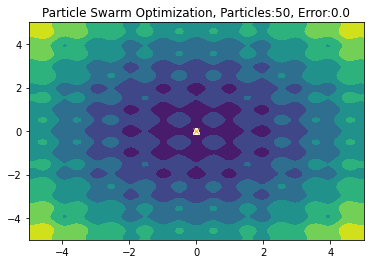

ERROR-------> 0.0009056580026953753
global_best_position 0.0009056580026953753 0.0001837827050685803
ERROR-------> 0.004322346239299613
global_best_position 0.004322346239299613 -1
ERROR-------> 0.0017703457269906409
global_best_position 0.0017703457269906409 -1
ERROR-------> 0.001056276064765882
global_best_position 0.001056276064765882 -1
ERROR-------> 0.0006949732138714637
global_best_position 0.0006949732138714637 -1
ERROR-------> 0.004292750021525293
global_best_position 0.004292750021525293 -1
ERROR-------> 0.0034797135883799513
global_best_position 0.0034797135883799513 -1
ERROR-------> 0.00047715615797194744
global_best_position 0.00047715615797194744 -1
ERROR-------> 0.0009867900412761088
global_best_position 0.0009867900412761088 -1
ERROR-------> 0.0006667827992137276
global_best_position 0.0006667827992137276 -1
ERROR-------> 0.0012365673800402988
global_best_position 0.0012365673800402988 -1
ERROR-------> 0.009773400808578359
global_best_position 0.009773400808578359 -1
ERR

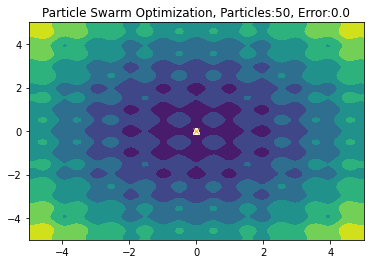

ERROR-------> 0.002529801658338826
global_best_position 0.002529801658338826 -1
ERROR-------> 0.0027981295373624704
global_best_position 0.0027981295373624704 0.002529801658338826
ERROR-------> 0.0009349572331149858
global_best_position 0.0009349572331149858 0.002529801658338826
ERROR-------> 0.0003575946710938638
global_best_position 0.0003575946710938638 0.0009349572331149858
ERROR-------> 0.000649969587517063
global_best_position 0.000649969587517063 0.0003575946710938638
ERROR-------> 0.005138155214595486
global_best_position 0.005138155214595486 0.0003575946710938638
ERROR-------> 0.0022680308815008487
global_best_position 0.0022680308815008487 0.0003575946710938638
ERROR-------> 0.001061850007586962
global_best_position 0.001061850007586962 0.0003575946710938638
ERROR-------> 0.002100404532987099
global_best_position 0.002100404532987099 0.0003575946710938638
ERROR-------> 0.00031053926756641204
global_best_position 0.00031053926756641204 0.0003575946710938638
ERROR-------> 0.000

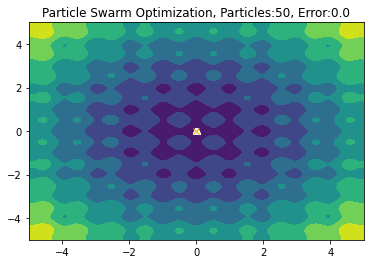

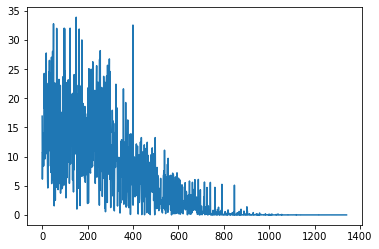

Results
Best Position: [0.0013513432682229912, -0.0005140593065753995]
Best Error: 0.00012587739578950874


In [6]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

num_particles = 50
iterations = 50

bounds = [(-4,4),(-4,4)]
initial = 8 * np.random.rand(num_particles, 2) - 4
error = []

colors = np.array([[1, 1, 1]] * num_particles)


class Particle: 
	def __init__(self,initial):
		self.pos=initial.tolist()
		self.vel=[] 
		self.best_pos=[] 
		self.best_error=-1 
		self.error=-1     
		for i in range(0,num_dimensions): 
			self.vel.append(random.uniform(-1,1))
	
	def update_velocity(self,global_best_position): 
		w = 0.5
		c1 = 1 
		c2 = 2 
		
		for i in range(0,num_dimensions): 
			r1=random.random()
			r2=random.random()
			
			cog_vel=c1*r1*(self.best_pos[i]-self.pos[i])
			social_vel=c2*r2*(global_best_position[i]-self.pos[i])
			self.vel[i]=w*self.vel[i]+cog_vel+social_vel 
		
	def update_position(self,bounds): 
		for i in range(0,num_dimensions):
			self.pos[i]=self.pos[i]+self.vel[i]
			
			
			if self.pos[i]>bounds[i][1]:
				self.pos[i]=bounds[i][1]

				
			if self.pos[i] < bounds[i][0]:
				self.pos[i]=bounds[i][0]
	
	
	def evaluate_fitness(self,fitness_function):
		self.error=fitness_function(self.pos) 
		print("ERROR------->",self.error)
		
		if self.error < self.best_error or self.best_error==-1:
			self.best_pos=self.pos 
			self.best_error=self.error

def fitness_function(x):
	A = 3
	total=0 
	total+= A*len(x) + sum([(i**2 - A * np.cos(2 * math.pi * i)) for i in x])
	return total


import time

class Interactive_PSO():
	def __init__(self,fitness_function,initial,bounds,num_particles):
		global num_dimensions 
		
		num_dimensions = 2
		global_best_error=-1             
		global_best_position=[] 
		self.gamma = 0.0001
		swarm=[]
		for i in range(0,num_particles):
			swarm.append(Particle(initial[i]))

		i=0
		
		for i in range(iterations): 
			xlist = np.linspace(-5.0, 5.0, 100)
			ylist = np.linspace(-5.0, 5.0, 100)
			X, Y = np.meshgrid(xlist, ylist)

			A = 3
			Z = A*2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))
			cp = plt.contourf(X, Y, Z)
			for j in range(0,num_particles):
				swarm[j].evaluate_fitness(fitness_function)
				print('global_best_position',swarm[j].error,global_best_error)

				
				if swarm[j].error < global_best_error or global_best_error == -1:
					global_best_position=list(swarm[j].pos) 
					global_best_error=float(swarm[j].error)
					error.append(global_best_error)
					plt.title("Particle Swarm Optimization, Particles:{}, Error:{}".format(num_particles,round(global_best_error,1)))
					
				if i%2==0:	
					global_best_error=-1
					global_best_position = list([swarm[j].pos[0]+self.gamma*(swarm[j].error)*random.random() ,swarm[j].pos[1]+self.gamma*(swarm[j].error)*random.random() ])
					
				
			pos_0 = {}
			pos_1 = {}
			for j in range(0,num_particles): 
				pos_0[j] = []
				pos_1[j] = []	
			
			for j in range(0,num_particles): 
				swarm[j].update_velocity(global_best_position)
				swarm[j].update_position(bounds) 
				
			
				pos_0[j].append(swarm[j].pos[0])
				pos_1[j].append(swarm[j].pos[1])
				plt.xlim([-5, 5])
				plt.ylim([-5, 5])
				
			for j in range(0,num_particles):
				plt.plot(pos_0[j], pos_1[j],  color = colors[j],marker = '^'  )


			x,y = 0, 0	 
			plt.plot(float(x), float(y),  color = 'orange',marker = 'x'  )
			plt.pause(0.01)
			if i != iterations - 1:
				plt.clf()
			else:
				plt.show()
				plt.plot([i for i in range(len(error))], error)
				plt.show()
		print ('Results')
		print ('Best Position:',global_best_position)
		print( 'Best Error:',global_best_error)

		
Interactive_PSO(fitness_function,initial,bounds,num_particles=num_particles)
if __name__ == "__Interactive_PSO__":
    main()